In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(argparse)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(cowplot)))
suppressPackageStartupMessages(suppressWarnings(library(patchwork)))

In [2]:
cell_type <- "PBMC"

In [3]:
# make the figures directory if it doesn't exist
if (!dir.exists("../figures")) {
    dir.create("../figures")
}
redundancy_index_plot_not_shuffled_path <- file.path(paste0(
    "../", 
    "figures/",
    cell_type,
    "_redundancy_index_not_shuffled_plot.png"))

redundancy_index_plot_shuffled_path <- file.path(paste0(
    "../", 
    "figures/",
    cell_type,
    "_redundancy_index_shuffled_plot.png"))

# import data
redundancy_file_path <- file.path(paste0(
    "../", 
    "../",
    "../",
    "7.redundancy_analysis/",
    "results/",
    cell_type,
    "_redundancy_analysis.csv"))

redundancy_df <- read.csv(redundancy_file_path)
head(redundancy_df)

,RI_u,RI_v,u_k,v_k,r2,Shuffle,global_RI_u,global_RI_v,global_RI_u_v,global_min,global_max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-26.57856,-268.4791,0.0009070606,0.009162529,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563
2,-26.04870,-794.6672,0.0008889779,0.027120032,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563
3,-27.13976,-316.8790,0.0009262132,0.010814299,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563
4,-26.40765,-754.9614,0.0009012281,0.025764972,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563
5,-26.61751,-278.7562,0.0009083900,0.009513262,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563
6,-26.39175,-934.6497,0.0009006854,0.031897290,-29301.85,True,7.360501,92.6395,-52737.39,-1498.675,-23.53563


In [4]:
unique(redundancy_df$Shuffle)

[1] "True"  "False"

### Plot of Redundancy Index

In [5]:
# change True to Shuffled data via mutate
redundancy_df <- redundancy_df %>% mutate(Shuffle = ifelse(Shuffle == "True", "Shuffled", "Not Shuffled"))
minimum_value <- min(redundancy_df$RI_u, redundancy_df$RI_v)
maximum_value <- max(redundancy_df$RI_u, redundancy_df$RI_v)
# shuffle = True df
shuffle_df <- redundancy_df[redundancy_df$Shuffle == "Shuffled",]
shuffle_min <- min(shuffle_df$RI_u, shuffle_df$RI_v)
shuffle_max <- max(shuffle_df$RI_u, shuffle_df$RI_v)
# shuffle = False df
no_shuffle_df <- redundancy_df[redundancy_df$Shuffle == "Not Shuffled",]
no_shuffle_min <- min(no_shuffle_df$RI_u, no_shuffle_df$RI_v)
no_shuffle_max <- max(no_shuffle_df$RI_u, no_shuffle_df$RI_v)


In [6]:
# linear model the shuffled and not shuffled data
non_shuffled_lm <- lm(RI_v ~ RI_u, data = no_shuffle_df)
non_shuffled_lm_summary <- summary(non_shuffled_lm)
non_shuffled_slope <- as.data.frame(non_shuffled_lm_summary$coefficients)$Estimate[2]
non_shuffled_intercept <- as.data.frame(non_shuffled_lm_summary$coefficients)$Estimate[1]

shuffled_lm <- lm(RI_v ~ RI_u, data = shuffle_df)
shuffled_lm_summary <- summary(shuffled_lm)
shuffled_slope <- as.data.frame(shuffled_lm_summary$coefficients)$Estimate[2]
shuffled_intercept <- as.data.frame(shuffled_lm_summary$coefficients)$Estimate[1]

In [7]:
# set cutoff for axis break
yticks_shuffle <- c(-1000,-100,-50,-10)
# function to transform data to y position
trans <- function(x){pmin(x,40) + 0.05*pmax(x-40,0)}

### shuffled data plot

In [8]:
RI_plot_inset_shuffle <- (
    ggplot(shuffle_df, aes(x=RI_u, y=RI_v, color=Shuffle))
    + geom_point()
    + theme_bw()
    + xlim(shuffle_min, shuffle_max)
    + ylim(shuffle_min, shuffle_max)
    + xlab("Morphology Data Redundancy Index")
    + ylab("nELISA Data Redundancy Index")
    + geom_abline(intercept = 0, slope = 1)
    + ggtitle("Redundancy Index Plot of \n Shuffled Morphology and Shuffled nELISA Data")
    + theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        plot.title = element_text(size = 20, hjust = 0.5)

    )

)

In [9]:
RI_plot_w_inset <- (
    ggplot(shuffle_df, aes(x=RI_u, y=RI_v, color=Shuffle))
    + geom_point()
    + theme_bw()
    + xlim(-50, shuffle_max)
    + ylim(-600, shuffle_max)
    + geom_abline(intercept = 0, slope = 1)
    + theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 14),
        plot.title = element_text(size = 20, hjust = 0.5)
    )
)
# drop legend
RI_plot_inset_shuffle <- RI_plot_inset_shuffle + theme(legend.position = "none")
# drop axis labels
RI_plot_w_inset <- RI_plot_w_inset + theme(axis.title.x = element_blank(), axis.title.y = element_blank())
RI_plot_w_inset <- RI_plot_w_inset + theme(legend.position = "none")
shuffle_inset_full <- (
  ggdraw() 
  + draw_plot(RI_plot_inset_shuffle)
  + draw_plot(RI_plot_w_inset, x = 0.12, y = 0.57, width = 0.3, height = 0.3)
)
ggsave(redundancy_index_plot_shuffled_path, width = 8, height = 8)


Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


### non shuffled data plot

In [10]:
RI_plot_no_shuffle <- (
    ggplot(no_shuffle_df, aes(x=RI_u, y=RI_v, color=Shuffle))
    + geom_point()
    + theme_bw()
    + xlim(no_shuffle_min, no_shuffle_max)
    + ylim(no_shuffle_min, no_shuffle_max)
    + xlab("Morphology Data Redundancy Index")
    + ylab("nELISA Data Redundancy Index")
    + geom_abline(intercept = 0, slope = 1)
    + ggtitle("Redundancy Index Plot of \nMorphology and nELISA Data")
    # change color of points to blue
    + scale_color_manual(values = c("blue"))
    + theme(
        axis.title.x = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
        plot.title = element_text(size = 20, hjust = 0.5)

    )
)

In [11]:
RI_plot_inset_no_shuffle <- (
    ggplot(no_shuffle_df, aes(x=RI_u, y=RI_v, color=Shuffle))
    + geom_point()
    + theme_bw()
    + xlim(-0.1, no_shuffle_max)
    + ylim(-0.1, no_shuffle_max)
    + xlab("Morphology Data Redundancy Index")
    + ylab("nELISA Data Redundancy Index")
    + geom_abline(intercept = 0, slope = 1)
    # change color of points to blue
    + scale_color_manual(values = c("blue"))
    + theme(
        axis.title.x = element_text(size = 1),
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 12),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16),
        plot.title = element_text(size = 20, hjust = 0.5)
    )
)

In [12]:
# drop legend
RI_plot_no_shuffle <- RI_plot_no_shuffle + theme(legend.position = "none")
# drop axis labels
RI_plot_inset_no_shuffle <- RI_plot_inset_no_shuffle + theme(axis.title.x = element_blank(), axis.title.y = element_blank())
RI_plot_inset_no_shuffle <- RI_plot_inset_no_shuffle + theme(legend.position = "none")
no_shuffle_inset_full <- (
  ggdraw() 
  + draw_plot(RI_plot_no_shuffle)
  + draw_plot(RI_plot_inset_no_shuffle, x = 0.12, y = 0.57, width = 0.3, height = 0.3)
)
ggsave(redundancy_index_plot_not_shuffled_path, width = 8, height = 8)

Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


## Patch the plots together

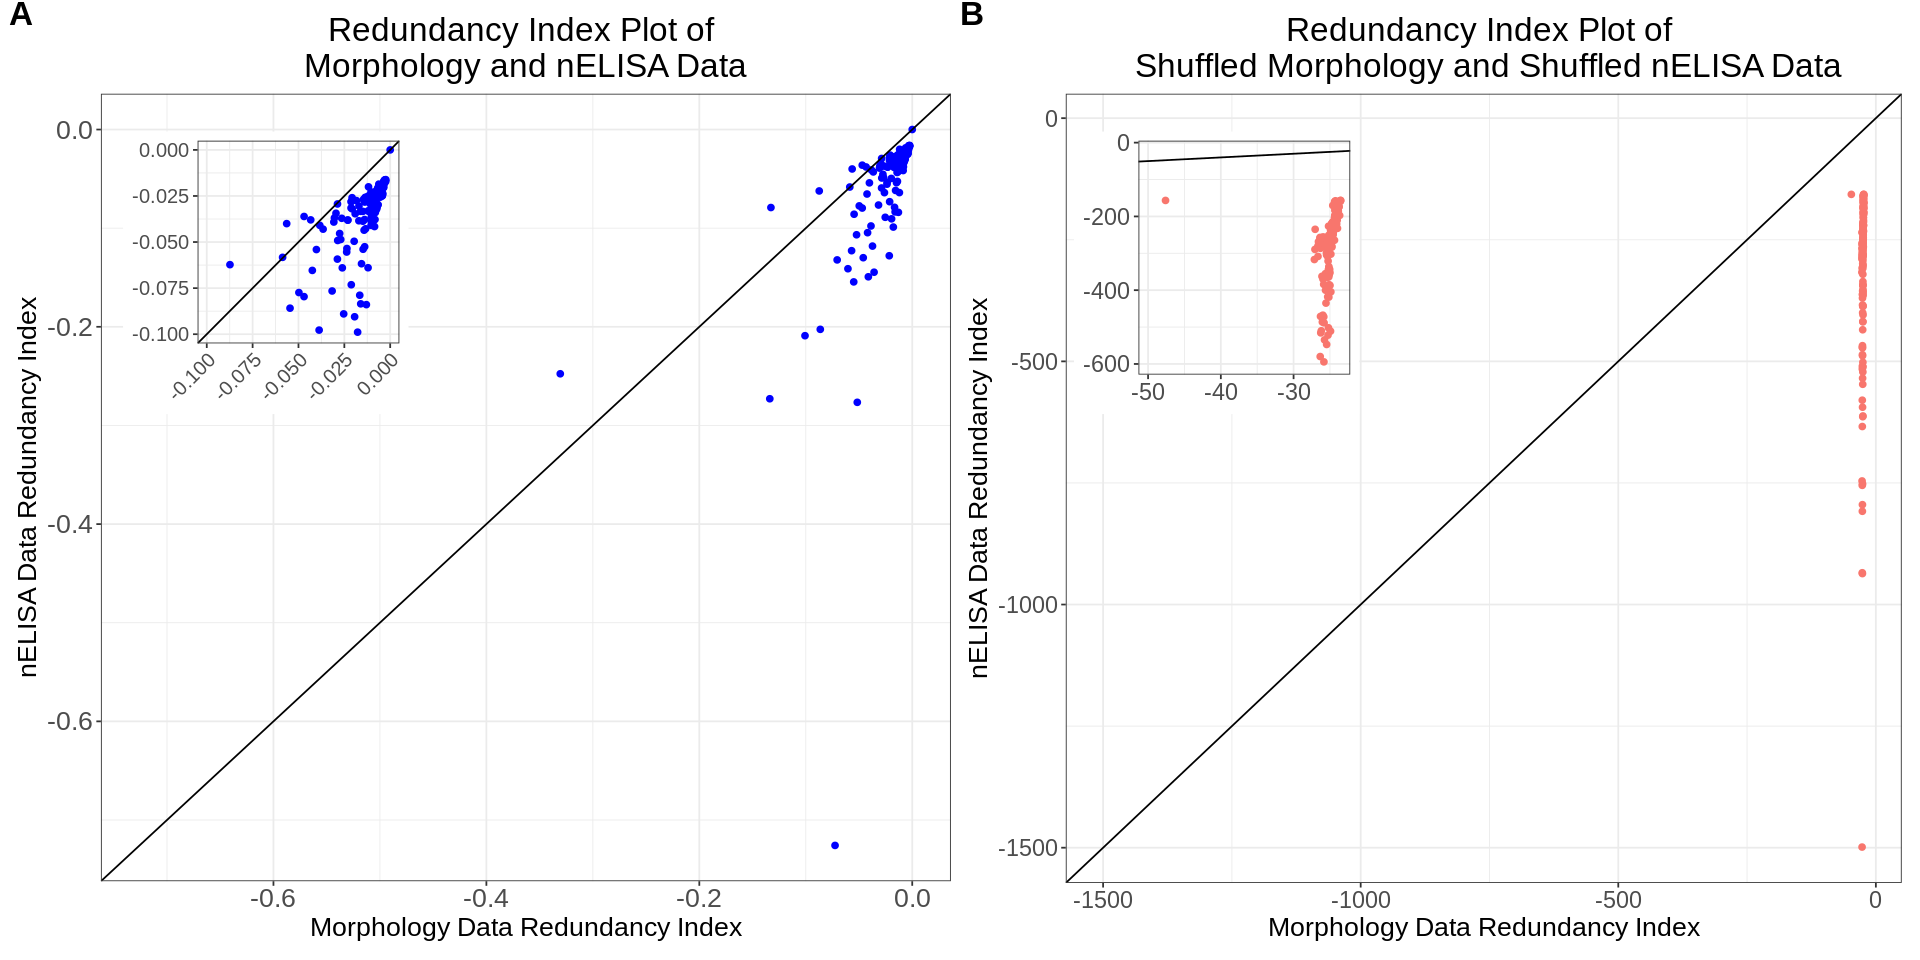

In [13]:
# width <- 8
# height <- 8
# options(repr.plot.width = width, repr.plot.height = height)
# shuffle_inset_full
# no_shuffle_inset_full

# patchwork
width <- 16
height <- 8
options(repr.plot.width = width, repr.plot.height = height)
figure <- (
    no_shuffle_inset_full
    + shuffle_inset_full
    
    + plot_layout(ncol = 2)
    + plot_annotation(tag_levels = "A")  & theme(plot.tag = element_text(size = 20))
)
figure
ggsave(file.path(paste0(
    "../", 
    "figures/",
    cell_type,
    "final_figure.png")), width = width, height = height
)

In [14]:
print(paste0(
    "non-shuffled: f(x) = ", 
    round(non_shuffled_slope, 2),
    "x + ",
    round(non_shuffled_intercept, 2),
    " + epsilon"
))

print(paste0(
    "shuffled: f(x) = ", 
    round(shuffled_slope, 2),
    "x + ",
    round(shuffled_intercept, 2),
    " + epsilon"
))

[1] "non-shuffled: f(x) = 1.2x + -0.03 + epsilon"
[1] "shuffled: f(x) = 18.02x + 136.95 + epsilon"
